In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import os
import folium

# Suppress openpyxl warnings
warnings.simplefilter("ignore")

In [2]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [16]:
# Set your working directory [Do not forget to make a short-cut of the folder shared by Galina to your Drive]
os.chdir('/content/drive/MyDrive/#WaterSoftHack25 - Water quality project/Project Codes/input datafiles/')

In [20]:
#Import data files
USGS_datatemp = pd.read_csv('Peak_Q_and_WQ_Sites_USGS_NWIS_r.csv')

turb_data = pd.read_csv('turb_measurement_counts.csv')

greenbay_data = pd.read_csv('turb_WI_40851385.csv')

df_data = pd.read_csv('11447650_cleaned_daily_data.csv')
df_data1 = pd.read_csv('11447650_cleaned_daily_labeled_data.csv')

In [25]:
df_data1

,DATE,SSC,SSD,Q,flow_category
0,1956-10-15 00:00:00+00:00,37.000000,1250.0,12500.0,normal
1,1956-10-16 00:00:00+00:00,38.142857,1300.0,12300.0,normal
2,1956-10-17 00:00:00+00:00,39.285714,1450.0,12100.0,normal
3,1956-10-18 00:00:00+00:00,40.428571,1300.0,12200.0,normal
4,1956-10-19 00:00:00+00:00,41.571429,1300.0,12000.0,normal
...,...,...,...,...,...
24450,2023-09-25 00:00:00+00:00,16.000000,806.0,18200.0,normal
24451,2023-09-26 00:00:00+00:00,15.000000,698.0,17800.0,normal
24452,2023-09-27 00:00:00+00:00,13.000000,619.0,17400.0,normal
24453,2023-09-28 00:00:00+00:00,13.000000,582.0,17200.0,normal


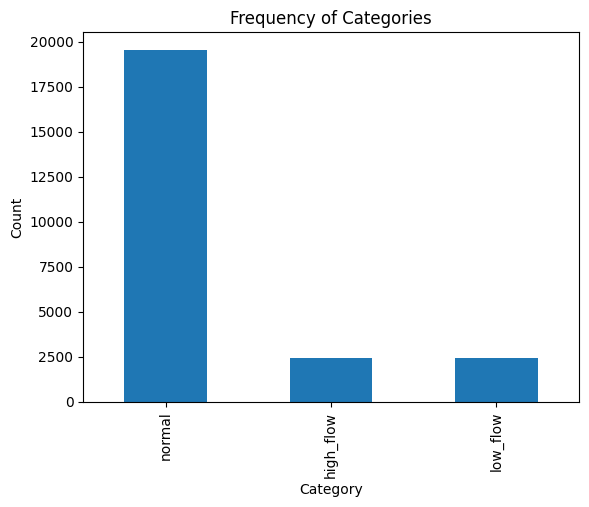

In [26]:
df_data1['flow_category'].value_counts().plot.bar()

plt.title('Frequency of Categories')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

In [ ]:
USGS_datatemp.columns

Index(['agency_cd', 'site_no', 'station_nm', 'site_tp_cd', 'dec_lat_va',
       'dec_long_va', 'coord_acy_cd', 'dec_coord_datum_cd', 'state_cd',
       'alt_va', 'alt_acy_va', 'alt_datum_cd', 'huc_cd', 'data_types_cd',
       'instruments_cd', 'peak_begin_date', 'peak_end_date', 'peak_count_nu',
       'qw_begin_date', 'qw_end_date', 'qw_count_nu', 'gw_begin_date',
       'gw_end_date', 'gw_count_nu'],
      dtype='object')

In [ ]:
turb_data.columns

Index(['Unnamed: 0', 'site_no', 'state', 'station_nm', 'latitude', 'longitude',
       'datum', 'huc_cd', 'n_measurements'],
      dtype='object')

In [ ]:
turb_data.head(2)

,Unnamed: 0,site_no,state,station_nm,latitude,longitude,datum,huc_cd,n_measurements
0,1,40851385,WI,"FOX RIVER AT OIL TANK DEPOT AT GREEN BAY, WI",44.528611,-88.01000,NAD83,4030204.0,1175629
1,2,1579550,MD,"SUSQUEHANNA RIVER NEAR DARLINGTON, MD",39.626056,-76.15775,NAD83,2050306.0,847413


In [ ]:
greenbay_data.columns

Index(['Unnamed: 0', 'agency_cd', 'site_no', 'dateTime', 'X_63680_00000',
       'X_63680_00000_cd', 'X_00060_00000', 'X_00060_00000_cd',
       'X_USG...USG._63680_00000', 'X_USG...USG._63680_00000_cd',
       'X_MC7...MC7._63680_00000', 'X_MC7...MC7._63680_00000_cd',
       'X_L3T...L3T._63680_00000', 'X_L3T...L3T._63680_00000_cd',
       'X_L3B...L3B._63680_00000', 'X_L3B...L3B._63680_00000_cd',
       'X_EXO...UPPER.PUMP_63680_00000', 'X_EXO...UPPER.PUMP_63680_00000_cd',
       'X_EXO...LOWER.PUMP_63680_00000', 'X_EXO...LOWER.PUMP_63680_00000_cd',
       'tz_cd', 'station_nm', 'dec_lat_va', 'dec_long_va', 'coord_acy_cd',
       'dec_coord_datum_cd', 'huc_cd', 'state'],
      dtype='object')

In [ ]:
greenbay_data.head(2)

,Unnamed: 0,agency_cd,site_no,dateTime,X_63680_00000,X_63680_00000_cd,X_00060_00000,X_00060_00000_cd,X_USG...USG._63680_00000,X_USG...USG._63680_00000_cd,...,X_EXO...LOWER.PUMP_63680_00000,X_EXO...LOWER.PUMP_63680_00000_cd,tz_cd,station_nm,dec_lat_va,dec_long_va,coord_acy_cd,dec_coord_datum_cd,huc_cd,state
0,1,USGS,40851385,2011-03-18 05:05:00,10.0,A,13600.0,A,NaN,NaN,...,NaN,NaN,UTC,"FOX RIVER AT OIL TANK DEPOT AT GREEN BAY, WI",44.528611,-88.01,S,NAD83,4030204,WI
1,2,USGS,40851385,2011-03-18 05:10:00,10.0,A,12000.0,A,NaN,NaN,...,NaN,NaN,UTC,"FOX RIVER AT OIL TANK DEPOT AT GREEN BAY, WI",44.528611,-88.01,S,NAD83,4030204,WI


In [ ]:
# Create map centered around mean of lats and lons
m = folium.Map(location=[turb_data['latitude'].mean(), turb_data['longitude'].mean()], zoom_start=5)

# Add points with labels
for _, row in turb_data.iterrows():
    folium.Marker(
        location=[row['latitude'], row['longitude']],
        popup=row['site_no']
    ).add_to(m)

# Show map in Jupyter or save to HTML
m

In [ ]:
# Drop duplicate coordinates (keep first occurrence)
greenbay_dedup = greenbay_data.drop_duplicates(subset=['dec_lat_va', 'dec_long_va'], keep='first')

# Extract coordinates
lats = greenbay_dedup['dec_lat_va']
lons = greenbay_dedup['dec_long_va']

# Determine map center (mean of coordinates)
center_lat = lats.mean()
center_lon = lons.mean()

# Define zoom level
if len(greenbay_dedup) == 1:
    zoom_start = 16  # Focus tightly on single point
else:
    zoom_start = 13  # Slightly broader view for multiple points

# Create the map with computed center and zoom
m = folium.Map(location=[center_lat, center_lon], zoom_start=zoom_start)

# Add markers
for _, row in greenbay_dedup.iterrows():
    folium.Marker(
        location=[row['dec_lat_va'], row['dec_long_va']],
        popup=row['site_no'],
        tooltip=row['site_no']
    ).add_to(m)

# Optional: Auto-fit bounds for better zoom when points are spread
if len(greenbay_dedup) > 1:
    # Expand bounds slightly for visual padding
    coords = greenbay_dedup[['dec_lat_va', 'dec_long_va']].values.tolist()
    m.fit_bounds([[lats.min(), lons.min()], [lats.max(), lons.max()]])

m  # Display in Jupyter

In [ ]:
USGS_datatemp.head(2)

,agency_cd,site_no,station_nm,site_tp_cd,dec_lat_va,dec_long_va,coord_acy_cd,dec_coord_datum_cd,state_cd,alt_va,...,instruments_cd,peak_begin_date,peak_end_date,peak_count_nu,qw_begin_date,qw_end_date,qw_count_nu,gw_begin_date,gw_end_date,gw_count_nu
0,USGS,11303500,SAN JOAQUIN R NR VERNALIS CA,ST,37.676012,-121.266291,S,NAD83,6.0,2.57,...,NNNNYNNNNNNNNNNNNNNNNNNNNNNNNN,10/15/1923,3/6/2024,96.0,12/2/1950,2/7/2024,10183.0,--,--,0.0
1,USGS,4193500,Maumee River at Waterville OH,ST,41.500053,-83.712715,S,NAD83,39.0,595.25,...,NNNNYNNNNNNNNNNNNNNNNNNNNNNNNN,3/11/1900,4/4/2024,104.0,1/25/1957,2/7/2024,6860.0,--,--,0.0


In [ ]:
# Step 1: Deduplicate by coordinates
greenbay_dedup = greenbay_data.drop_duplicates(subset=['dec_lat_va', 'dec_long_va'], keep='first')

# Step 2: Ensure we have at least one point
if greenbay_dedup.empty:
    raise ValueError("No data available after removing duplicates.")

# Step 3: Extract the single point (even if there are multiple unique points, we'll handle it safely)
# If you expect only one unique location, take the first row
row = greenbay_dedup.iloc[0]  # Get the first (or only) unique point
center_lat = row['dec_lat_va']
center_lon = row['dec_long_va']

# Step 4: Create map centered exactly on that point
m = folium.Map(location=[center_lat, center_lon], zoom_start=15)  # Higher zoom for single point

# Step 5: Add marker
folium.Marker(
    location=[center_lat, center_lon],
    popup=f"Site: {row['site_no']}",
    tooltip=row['site_no']
).add_to(m)

# Optional: Add a circle or icon to highlight it more
folium.Circle(
    location=[center_lat, center_lon],
    radius=10,  # meters
    color='red',
    fill=True,
    fillColor='red'
).add_to(m)

# Display the map
m

In [ ]:
#
column_mapping = {
    # --- General Parameter Codes ---
    'X_63680_00000': 'Specific_Conductance_µS/cm',
    'X_63680_00000_cd': 'Specific_Conductance_Quality_Flag',
    'X_00060_00000': 'Water_Temperature_°C',
    'X_00060_00000_cd': 'Water_Temperature_Quality_Flag',

    # --- USG Sensor (likely primary or reference sensor) ---
    'X_USG...USG._63680_00000': 'USG_Specific_Conductance_µS/cm',
    'X_USG...USG._63680_00000_cd': 'USG_Specific_Conductance_Quality_Flag',

    # --- McLeod 7-Sensor (common USGS multi-parameter probe) ---
    'X_MC7...MC7._63680_00000': 'MC7_Specific_Conductance_µS/cm',
    'X_MC7...MC7._63680_00000_cd': 'MC7_Specific_Conductance_Quality_Flag',

    # --- L3T Sensor (possibly turbidity or level) ---
    'X_L3T...L3T._63680_00000': 'L3T_Specific_Conductance_µS/cm',
    'X_L3T...L3T._63680_00000_cd': 'L3T_Specific_Conductance_Quality_Flag',

    # --- L3B Sensor ---
    'X_L3B...L3B._63680_00000': 'L3B_Specific_Conductance_µS/cm',
    'X_L3B...L3B._63680_00000_cd': 'L3B_Specific_Conductance_Quality_Flag',

    # --- EXO Upper Pump Zone ---
    'X_EXO...UPPER.PUMP_63680_00000': 'EXO_UpperPump_Specific_Conductance_µS/cm',
    'X_EXO...UPPER.PUMP_63680_00000_cd': 'EXO_UpperPump_Specific_Conductance_Quality_Flag',

    # --- EXO Lower Pump Zone ---
    'X_EXO...LOWER.PUMP_63680_00000': 'EXO_LowerPump_Specific_Conductance_µS/cm',
    'X_EXO...LOWER.PUMP_63680_00000_cd': 'EXO_LowerPump_Specific_Conductance_Quality_Flag',

    # Optional: If you have temperature from these sensors too
    # Repeat pattern for 00060 if needed
}

In [ ]:
# Apply renaming
greenbay_clean = greenbay_data.rename(columns=column_mapping)

In [ ]:
greenbay_clean.columns

Index(['Unnamed: 0', 'agency_cd', 'site_no', 'dateTime',
       'Specific_Conductance_µS/cm', 'Specific_Conductance_Quality_Flag',
       'Water_Temperature_°C', 'Water_Temperature_Quality_Flag',
       'USG_Specific_Conductance_µS/cm',
       'USG_Specific_Conductance_Quality_Flag',
       'MC7_Specific_Conductance_µS/cm',
       'MC7_Specific_Conductance_Quality_Flag',
       'L3T_Specific_Conductance_µS/cm',
       'L3T_Specific_Conductance_Quality_Flag',
       'L3B_Specific_Conductance_µS/cm',
       'L3B_Specific_Conductance_Quality_Flag',
       'EXO_UpperPump_Specific_Conductance_µS/cm',
       'EXO_UpperPump_Specific_Conductance_Quality_Flag',
       'EXO_LowerPump_Specific_Conductance_µS/cm',
       'EXO_LowerPump_Specific_Conductance_Quality_Flag', 'tz_cd',
       'station_nm', 'dec_lat_va', 'dec_long_va', 'coord_acy_cd',
       'dec_coord_datum_cd', 'huc_cd', 'state'],
      dtype='object')

In [ ]:
greenbay_clean.head(5)

,Unnamed: 0,agency_cd,site_no,dateTime,Specific_Conductance_µS/cm,Specific_Conductance_Quality_Flag,Water_Temperature_°C,Water_Temperature_Quality_Flag,USG_Specific_Conductance_µS/cm,USG_Specific_Conductance_Quality_Flag,...,EXO_LowerPump_Specific_Conductance_µS/cm,EXO_LowerPump_Specific_Conductance_Quality_Flag,tz_cd,station_nm,dec_lat_va,dec_long_va,coord_acy_cd,dec_coord_datum_cd,huc_cd,state
0,1,USGS,40851385,2011-03-18 05:05:00,10.0,A,13600.0,A,NaN,NaN,...,NaN,NaN,UTC,"FOX RIVER AT OIL TANK DEPOT AT GREEN BAY, WI",44.528611,-88.01,S,NAD83,4030204,WI
1,2,USGS,40851385,2011-03-18 05:10:00,10.0,A,12000.0,A,NaN,NaN,...,NaN,NaN,UTC,"FOX RIVER AT OIL TANK DEPOT AT GREEN BAY, WI",44.528611,-88.01,S,NAD83,4030204,WI
2,3,USGS,40851385,2011-03-18 05:15:00,15.0,A,13100.0,A,NaN,NaN,...,NaN,NaN,UTC,"FOX RIVER AT OIL TANK DEPOT AT GREEN BAY, WI",44.528611,-88.01,S,NAD83,4030204,WI
3,4,USGS,40851385,2011-03-18 05:20:00,10.0,A,14300.0,A,NaN,NaN,...,NaN,NaN,UTC,"FOX RIVER AT OIL TANK DEPOT AT GREEN BAY, WI",44.528611,-88.01,S,NAD83,4030204,WI
4,5,USGS,40851385,2011-03-18 05:25:00,13.0,A,13700.0,A,NaN,NaN,...,NaN,NaN,UTC,"FOX RIVER AT OIL TANK DEPOT AT GREEN BAY, WI",44.528611,-88.01,S,NAD83,4030204,WI


In [ ]:
greenbay_data.head(5)

,Unnamed: 0,agency_cd,site_no,dateTime,X_63680_00000,X_63680_00000_cd,X_00060_00000,X_00060_00000_cd,X_USG...USG._63680_00000,X_USG...USG._63680_00000_cd,...,X_EXO...LOWER.PUMP_63680_00000,X_EXO...LOWER.PUMP_63680_00000_cd,tz_cd,station_nm,dec_lat_va,dec_long_va,coord_acy_cd,dec_coord_datum_cd,huc_cd,state
0,1,USGS,40851385,2011-03-18 05:05:00,10.0,A,13600.0,A,NaN,NaN,...,NaN,NaN,UTC,"FOX RIVER AT OIL TANK DEPOT AT GREEN BAY, WI",44.528611,-88.01,S,NAD83,4030204,WI
1,2,USGS,40851385,2011-03-18 05:10:00,10.0,A,12000.0,A,NaN,NaN,...,NaN,NaN,UTC,"FOX RIVER AT OIL TANK DEPOT AT GREEN BAY, WI",44.528611,-88.01,S,NAD83,4030204,WI
2,3,USGS,40851385,2011-03-18 05:15:00,15.0,A,13100.0,A,NaN,NaN,...,NaN,NaN,UTC,"FOX RIVER AT OIL TANK DEPOT AT GREEN BAY, WI",44.528611,-88.01,S,NAD83,4030204,WI
3,4,USGS,40851385,2011-03-18 05:20:00,10.0,A,14300.0,A,NaN,NaN,...,NaN,NaN,UTC,"FOX RIVER AT OIL TANK DEPOT AT GREEN BAY, WI",44.528611,-88.01,S,NAD83,4030204,WI
4,5,USGS,40851385,2011-03-18 05:25:00,13.0,A,13700.0,A,NaN,NaN,...,NaN,NaN,UTC,"FOX RIVER AT OIL TANK DEPOT AT GREEN BAY, WI",44.528611,-88.01,S,NAD83,4030204,WI


In [ ]:
import pandas as pd

# Convert to datetime with flexible parsing
greenbay_clean['dateTime'] = pd.to_datetime(greenbay_clean['dateTime'], format='mixed')

# Now set as index
greenbay_clean.set_index('dateTime', inplace=True)

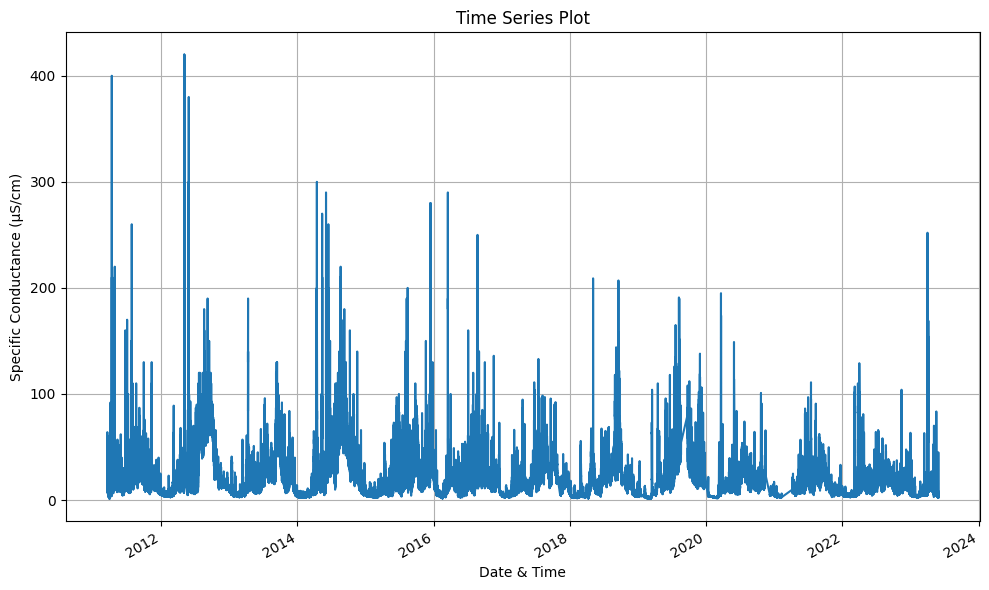

In [ ]:
greenbay_clean['Specific_Conductance_µS/cm'].plot(
    figsize=(10, 6),
    title='Time Series Plot',
    xlabel='Date & Time',
    ylabel='Specific Conductance (µS/cm)',
    legend=False
)
plt.grid(True)
plt.tight_layout()
plt.show()

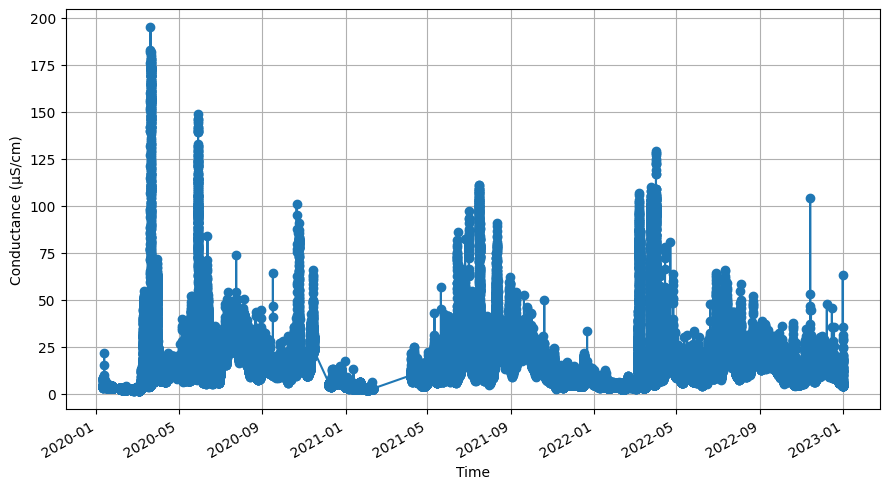

In [ ]:
start_time = '2020-01-01'
end_time = '2022-12-31'

subset = greenbay_clean.loc[start_time:end_time]

subset['Specific_Conductance_µS/cm'].plot(
    figsize=(9, 5),
    #title='Specific Conductance (5:10 AM – 5:40 AM, March 18, 2011)',
    xlabel='Time',
    ylabel='Conductance (µS/cm)',
    marker='o',
    grid=True
)
plt.tight_layout()
plt.show()

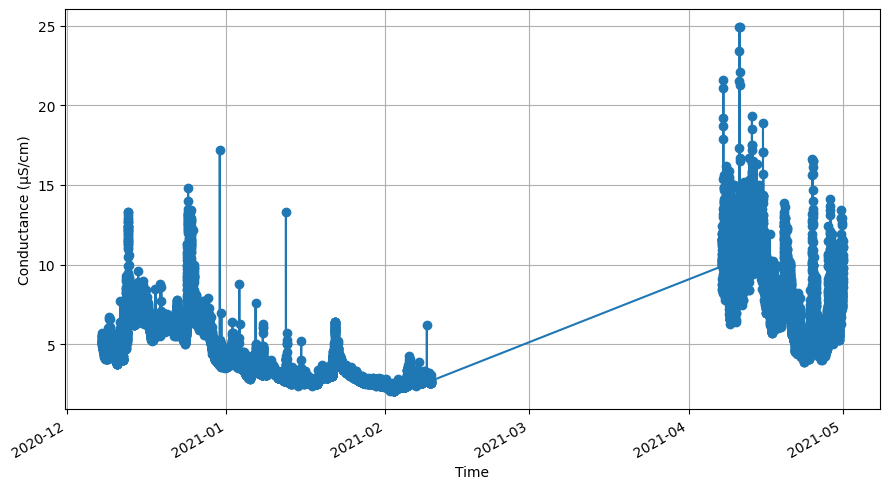

In [ ]:
start_time = '2020-12-01'
end_time = '2021-04-30'

subset = greenbay_clean.loc[start_time:end_time]

subset['Specific_Conductance_µS/cm'].plot(
    figsize=(9, 5),
    #title='Specific Conductance (5:10 AM – 5:40 AM, March 18, 2011)',
    xlabel='Time',
    ylabel='Conductance (µS/cm)',
    marker='o',
    grid=True
)
plt.tight_layout()
plt.show()

In [ ]:

# Extract the series
ts = greenbay_clean['Specific_Conductance_µS/cm']

# Optional: Resample to regular 5-min intervals (in case of gaps)
ts = ts.resample('5min').mean()  # or .first() if no aggregation needed

In [ ]:
print("=== Data Overview ===")
print(f"Date range: {ts.index.min()} to {ts.index.max()}")
print(f"Total observations: {len(ts)}")
print(f"Missing values: {ts.isna().sum()}")
print(f"Summary stats:\n{ts.describe()}")

# Fill or drop missing values if needed
ts = ts.dropna()  # or ts.fillna(method='ffill')

=== Data Overview ===
Date range: 2011-03-18 05:05:00 to 2023-05-30 17:45:00
Total observations: 1283481
Missing values: 107852
Summary stats:
count    1.175629e+06
mean     1.929617e+01
std      1.991524e+01
min      1.200000e+00
25%      7.000000e+00
50%      1.400000e+01
75%      2.400000e+01
max      4.200000e+02
Name: Specific_Conductance_µS/cm, dtype: float64


In [ ]:
ts

,Specific_Conductance_µS/cm
dateTime,
2011-03-18 05:05:00,10.0
2011-03-18 05:10:00,10.0
2011-03-18 05:15:00,15.0
2011-03-18 05:20:00,10.0
2011-03-18 05:25:00,13.0
...,...
2023-05-30 17:25:00,2.3
2023-05-30 17:30:00,2.2
2023-05-30 17:35:00,2.4


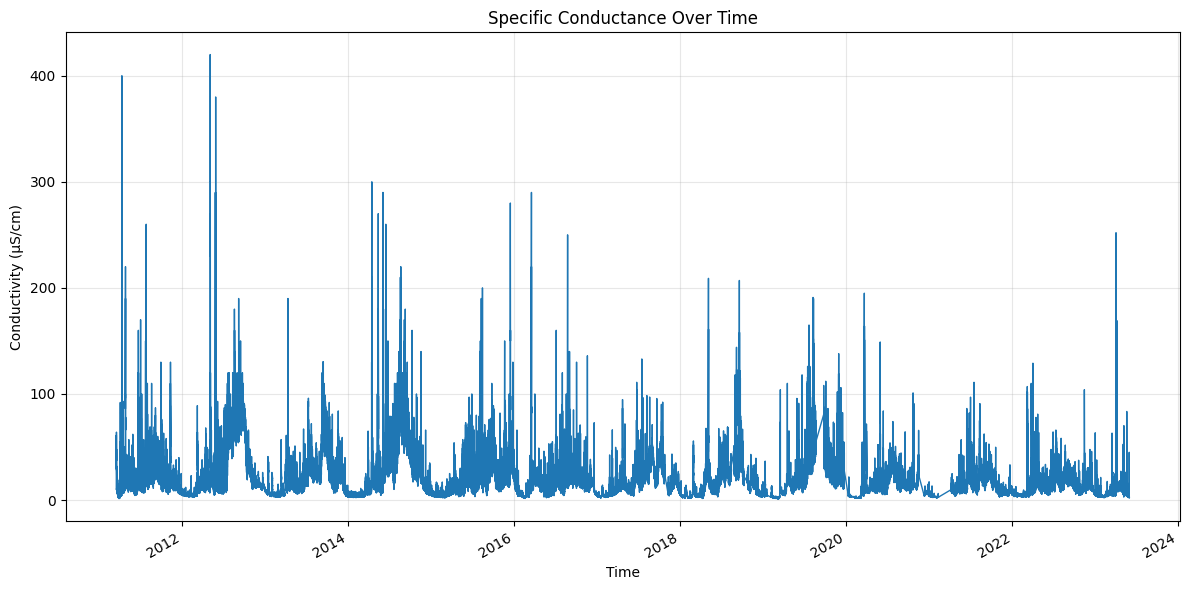

In [ ]:
plt.figure(figsize=(12, 6))
ts.plot(linewidth=1, title='Specific Conductance Over Time')
plt.xlabel('Time')
plt.ylabel('Conductivity (µS/cm)')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

**Trend and Seasonality Decomposition**

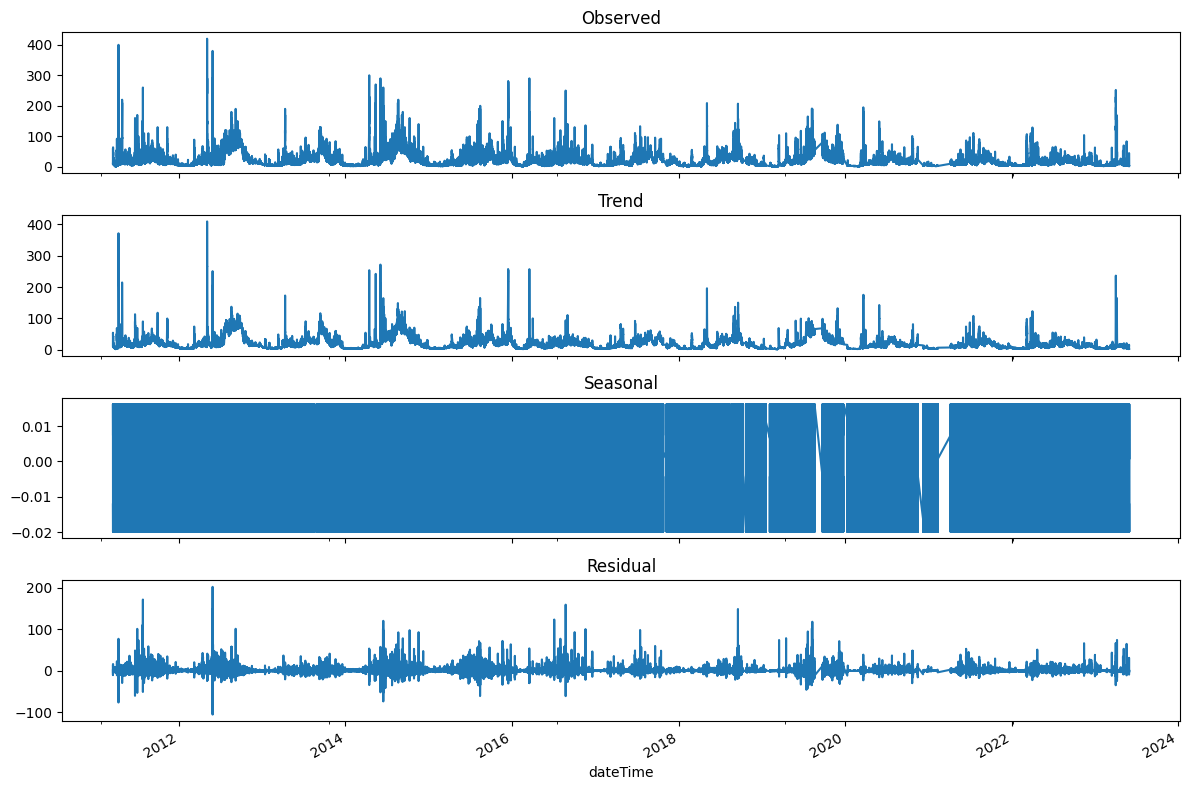

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Perform decomposition
# If less than 2 full cycles, use `model='additive'` and set `period` manually
# For 5-min data, ~288 points/day → use period=288 for daily seasonality
# But if you have only a few hours, use a smaller guess like 12 (12 × 5min = 1 hour)

decomposition = seasonal_decompose(ts, model='additive', period=12)  # Adjust period as needed

# Plot
fig, axes = plt.subplots(4, 1, figsize=(12, 8), sharex=True)
decomposition.observed.plot(ax=axes[0], title='Observed')
decomposition.trend.plot(ax=axes[1], title='Trend')
decomposition.seasonal.plot(ax=axes[2], title='Seasonal')
decomposition.resid.plot(ax=axes[3], title='Residual')
plt.tight_layout()
plt.show()

In [11]:
df

,DATE,SSC,SSD,discharge_combined
0,1956-10-15 00:00:00+00:00,37.000000,1250.0,12500.0
1,1956-10-16 00:00:00+00:00,38.142857,1300.0,12300.0
2,1956-10-17 00:00:00+00:00,39.285714,1450.0,12100.0
3,1956-10-18 00:00:00+00:00,40.428571,1300.0,12200.0
4,1956-10-19 00:00:00+00:00,41.571429,1300.0,12000.0
...,...,...,...,...
24450,2023-09-25 00:00:00+00:00,16.000000,806.0,18200.0
24451,2023-09-26 00:00:00+00:00,15.000000,698.0,17800.0
24452,2023-09-27 00:00:00+00:00,13.000000,619.0,17400.0
24453,2023-09-28 00:00:00+00:00,13.000000,582.0,17200.0


Generated synthetic data shape: (24455, 4)
                       DATE        SSC     SSD  discharge_combined
0 1956-10-15 00:00:00+00:00  37.000000  1250.0             12500.0
1 1956-10-16 00:00:00+00:00  38.142857  1300.0             12300.0
2 1956-10-17 00:00:00+00:00  39.285714  1450.0             12100.0
3 1956-10-18 00:00:00+00:00  40.428571  1300.0             12200.0
4 1956-10-19 00:00:00+00:00  41.571429  1300.0             12000.0

After feature engineering: (24426, 18) features
Features: ['SSC', 'discharge_combined', 'day_of_year', 'month', 'season', 'discharge_lag1', 'discharge_diff1', 'discharge_lag2', 'discharge_diff2', 'discharge_lag3', 'discharge_diff3', 'discharge_lag7', 'discharge_diff7', 'discharge_7d_mean', 'discharge_7d_std', 'discharge_30d_mean', 'd_discharge', 'd_discharge_7d']

Sequence shapes: X_train=(19533, 7, 17), y_train=(19533, 1)

Model Summary:


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_6 (LSTM)                   │ (None, 7, 128)         │        74,752 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 7, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_7 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 126,785 (495.25 KB)

 Trainable params: 126,785 (495.25 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
489/489 ━━━━━━━━━━━━━━━━━━━━ 18s 25ms/step - loss: 7.7947e-04 - mae: 0.0190 - val_loss: 2.8928e-04 - val_mae: 0.0153
Epoch 2/100
489/489 ━━━━━━━━━━━━━━━━━━━━ 19s 23ms/step - loss: 5.7283e-04 - mae: 0.0160 - val_loss: 3.0005e-04 - val_mae: 0.0164
Epoch 3/100
489/489 ━━━━━━━━━━━━━━━━━━━━ 11s 23ms/step - loss: 5.0577e-04 - mae: 0.0148 - val_loss: 3.4907e-04 - val_mae: 0.0202
Epoch 4/100
489/489 ━━━━━━━━━━━━━━━━━━━━ 19s 20ms/step - loss: 4.4712e-04 - mae: 0.0144 - val_loss: 3.0785e-04 - val_mae: 0.0162
Epoch 5/100
489/489 ━━━━━━━━━━━━━━━━━━━━ 11s 23ms/step - loss: 3.8552e-04 - mae: 0.0139 - val_loss: 3.8092e-04 - val_mae: 0.0184
Epoch 6/100
489/489 ━━━━━━━━━━━━━━━━━━━━ 11s 23ms/step - loss: 4.1680e-04 - mae: 0.0136 - val_loss: 2.6265e-04 - val_mae: 0.0132
Epoch 7/100
489/489 ━━━━━━━━━━━━━━━━━━━━ 9s 18ms/step - loss: 4.0880e-04 - mae: 0.0136 - val_loss: 3.7477e-04 - val_mae: 0.0168
Epoch 8/100
489/489 ━━━━━━━━━━━━━━━━━━━━ 11s 23ms/step - loss: 3.6613e-04 - mae: 0.0130 - val_loss

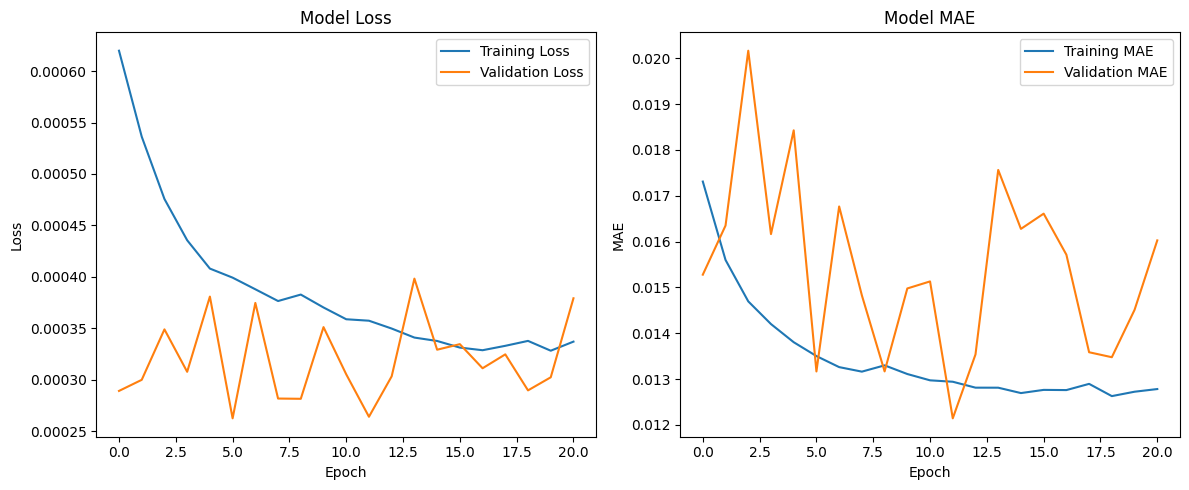

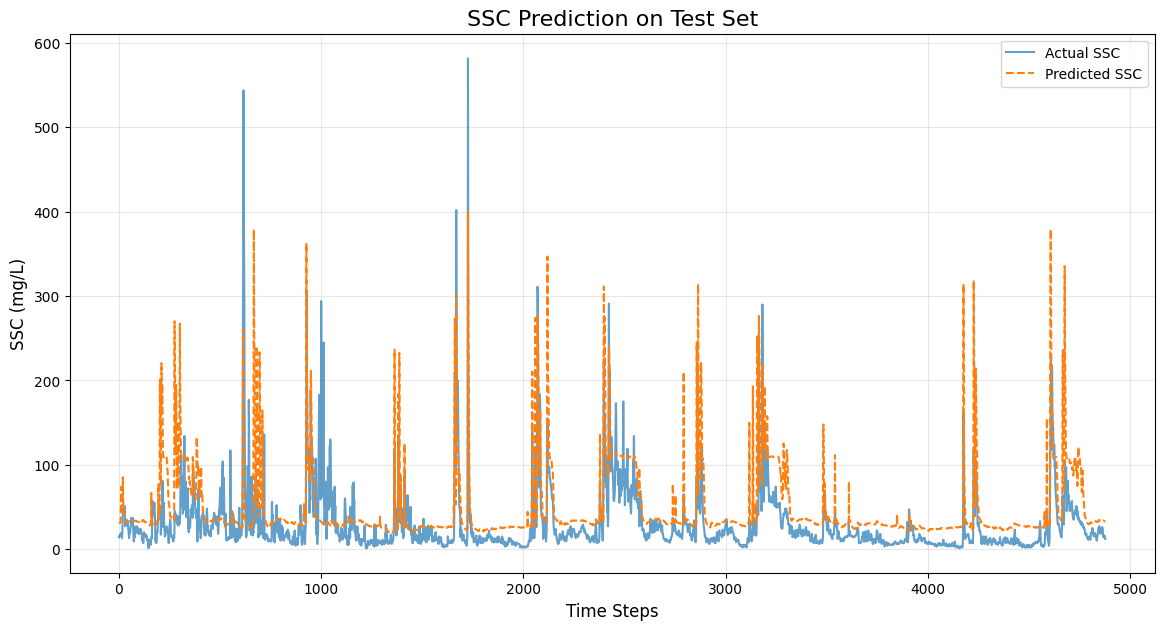

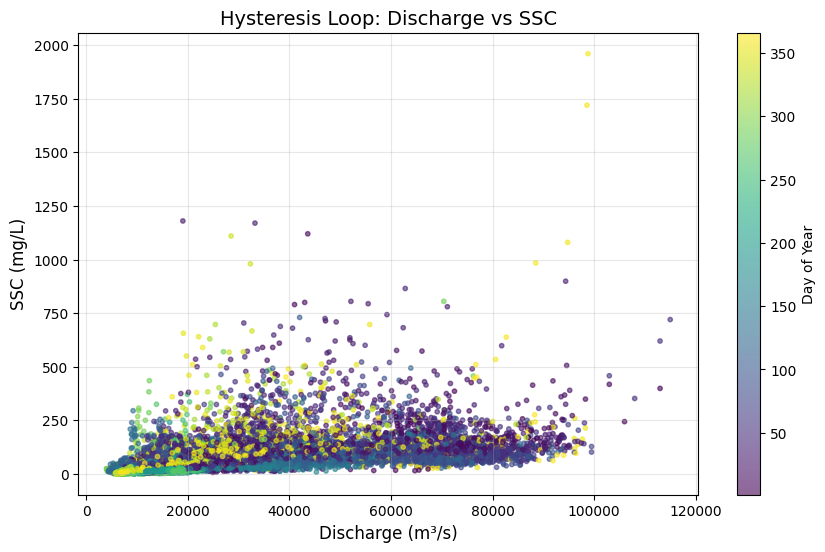

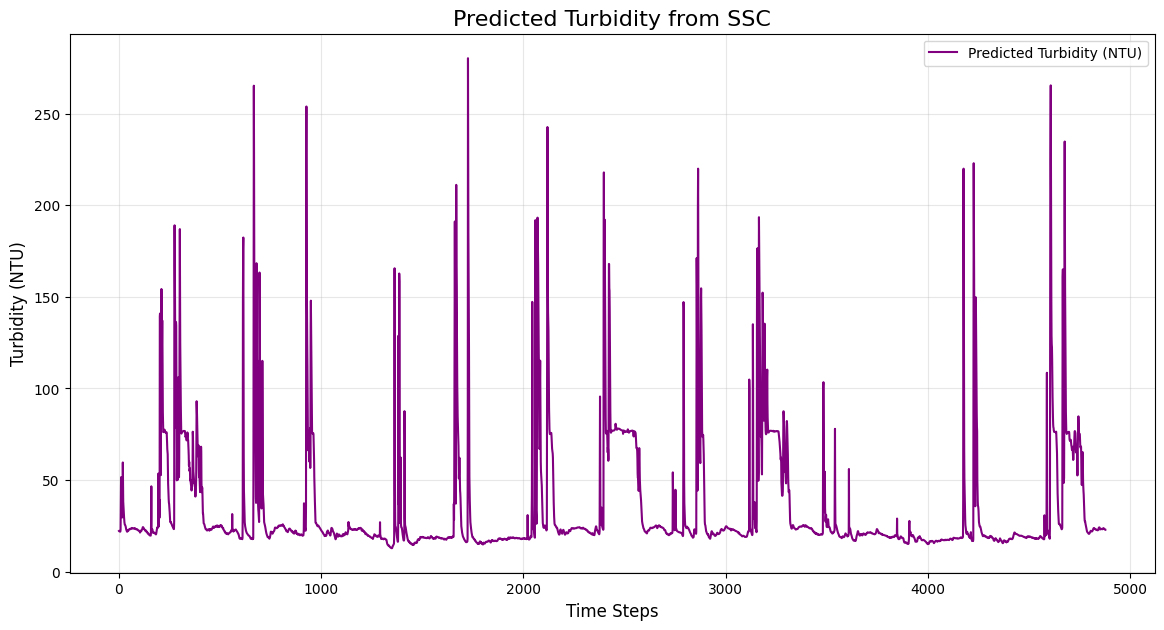


Turbidity prediction example (first 5 values):
SSC: [31.642294 31.401213 31.428164 31.378826 31.257463]
Turbidity (NTU): [22.149605 21.980848 21.999714 21.965178 21.880224]

Model and scalers saved successfully!
To use in production:
1. Load model with keras.models.load_model('ssc_prediction_model.keras')
2. Load scalers with np.load('scaler_X.npy', allow_pickle=True).item()


In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.losses import Huber
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
df = pd.read_csv('11447650_cleaned_daily_data.csv', parse_dates=['DATE'])

print(f"Generated synthetic data shape: {df.shape}")
print(df.head())

# ======================
# 2. FEATURE ENGINEERING (FIXED)
# ======================
def engineer_features(df):
    """Create time-based and hydrological features"""
    df = df.copy()

    # CRITICAL FIX: Ensure DATE is datetime
    if not pd.api.types.is_datetime64_any_dtype(df['DATE']):
        df['DATE'] = pd.to_datetime(df['DATE'])

    # Time features
    df['day_of_year'] = df['DATE'].dt.dayofyear
    df['month'] = df['DATE'].dt.month
    df['season'] = (df['DATE'].dt.month % 12 + 3) // 3  # 1=Winter, 2=Spring, etc.

    # Lag features (critical for hysteresis)
    for lag in [1, 2, 3, 7]:
        df[f'discharge_lag{lag}'] = df['discharge_combined'].shift(lag)
        df[f'discharge_diff{lag}'] = df['discharge_combined'] - df[f'discharge_lag{lag}']

    # Rolling statistics
    df['discharge_7d_mean'] = df['discharge_combined'].rolling(7).mean()
    df['discharge_7d_std'] = df['discharge_combined'].rolling(7).std()
    df['discharge_30d_mean'] = df['discharge_combined'].rolling(30).mean()

    # Rate of change
    df['d_discharge'] = df['discharge_combined'].diff()
    df['d_discharge_7d'] = df['discharge_combined'].diff(7)

    # Drop SSD since it's derived from SSC (not available in real-time prediction)
    df.drop(columns=['SSD'], inplace=True)

    # Remove NaN from feature engineering
    df.dropna(inplace=True)
    return df.set_index('DATE')

# Apply the fix: ensure DATE is datetime before feature engineering
df['DATE'] = pd.to_datetime(df['DATE'])
df_processed = engineer_features(df.copy())
print(f"\nAfter feature engineering: {df_processed.shape} features")
print("Features:", df_processed.columns.tolist())

# ======================
# 3. DATA PREPROCESSING
# ======================
# Split data (preserve temporal order)
train_size = int(0.8 * len(df_processed))
train_df = df_processed.iloc[:train_size]
test_df = df_processed.iloc[train_size:]

# Scale features
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

X_train = train_df.drop(columns=['SSC'])
y_train = train_df['SSC'].values.reshape(-1, 1)

X_test = test_df.drop(columns=['SSC'])
y_test = test_df['SSC'].values.reshape(-1, 1)

X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)
y_train_scaled = scaler_y.fit_transform(y_train)
y_test_scaled = scaler_y.transform(y_test)

# Create sequences for LSTM
def create_sequences(X, y, time_steps=7):
    X_seq, y_seq = [], []
    for i in range(time_steps, len(X)):
        X_seq.append(X[i-time_steps:i])
        y_seq.append(y[i])
    return np.array(X_seq), np.array(y_seq)

TIME_STEPS = 7
X_train_seq, y_train_seq = create_sequences(X_train_scaled, y_train_scaled, TIME_STEPS)
X_test_seq, y_test_seq = create_sequences(X_test_scaled, y_test_scaled, TIME_STEPS)

print(f"\nSequence shapes: X_train={X_train_seq.shape}, y_train={y_train_seq.shape}")

# ======================
# 4. BUILD & TRAIN MODEL (FIXED LOSS FUNCTION)
# ======================
model = Sequential([
    LSTM(128, return_sequences=True, input_shape=(TIME_STEPS, X_train_seq.shape[2])),
    Dropout(0.3),
    LSTM(64, return_sequences=False),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(1)
])

# FIX: Use Huber() class directly instead of string identifier
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss=Huber(),  # CORRECT WAY TO USE HUBER LOSS
    metrics=['mae']
)

print("\nModel Summary:")
model.summary()

# Train with early stopping
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=15,
    restore_best_weights=True
)

history = model.fit(
    X_train_seq,
    y_train_seq,
    epochs=100,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stop],
    verbose=1
)

# ======================
# 5. EVALUATION & PLOTS
# ======================
# Predict and inverse transform
train_pred = model.predict(X_train_seq)
test_pred = model.predict(X_test_seq)

train_pred_inv = scaler_y.inverse_transform(train_pred)
test_pred_inv = scaler_y.inverse_transform(test_pred)
y_train_inv = scaler_y.inverse_transform(y_train_seq)
y_test_inv = scaler_y.inverse_transform(y_test_seq)

# Calculate metrics
train_mae = mean_absolute_error(y_train_inv, train_pred_inv)
test_mae = mean_absolute_error(y_test_inv, test_pred_inv)
train_r2 = r2_score(y_train_inv, train_pred_inv)
test_r2 = r2_score(y_test_inv, test_pred_inv)

print(f"\n{'='*50}")
print(f"TRAIN MAE: {train_mae:.2f} mg/L | R²: {train_r2:.4f}")
print(f"TEST MAE: {test_mae:.2f} mg/L | R²: {test_r2:.4f}")
print(f"{'='*50}")

# Plot training history
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('Model MAE')
plt.ylabel('MAE')
plt.xlabel('Epoch')
plt.legend()
plt.tight_layout()
plt.savefig('training_history.png', dpi=300)
plt.show()

# Plot predictions vs actual
plt.figure(figsize=(14, 7))
plt.plot(y_test_inv, label='Actual SSC', alpha=0.7)
plt.plot(test_pred_inv, label='Predicted SSC', linestyle='--')
plt.title('SSC Prediction on Test Set', fontsize=16)
plt.xlabel('Time Steps', fontsize=12)
plt.ylabel('SSC (mg/L)', fontsize=12)
plt.legend()
plt.grid(alpha=0.3)
plt.savefig('ssc_prediction.png', dpi=300)
plt.show()

# ======================
# 6. FIXED HISTORGRAM PLOT (USING DATE COLUMN)
# ======================
# Plot hysteresis loop (discharge vs SSC) - FIXED VERSION
plt.figure(figsize=(10, 6))

# FIX: Use the DATE column to get dayofyear, not the index
date_series = pd.Series(df['DATE']).dt
plt.scatter(
    df['discharge_combined'],
    df['SSC'],
    c=date_series.dayofyear,
    cmap='viridis',
    alpha=0.6,
    s=10
)
plt.colorbar(label='Day of Year')
plt.title('Hysteresis Loop: Discharge vs SSC', fontsize=14)
plt.xlabel('Discharge (m³/s)', fontsize=12)
plt.ylabel('SSC (mg/L)', fontsize=12)
plt.grid(alpha=0.3)
plt.savefig('hysteresis_loop.png', dpi=300)
plt.show()

# ======================
# 7. TURBIDITY CONVERSION
# ======================
def ssc_to_turbidity(ssc_values, site_calibration=None):
    """
    Convert SSC to Turbidity (NTU) using site-specific calibration

    Default calibration (adjust based on your site!):
    - River systems: turbidity = 0.7 * SSC
    - Turbid estuaries: turbidity = 1.2 * SSC
    """
    if site_calibration is None:
        # Typical river calibration (MUST BE VALIDATED FOR YOUR SITE)
        site_calibration = 0.7

    return ssc_values * site_calibration

# Example usage on test predictions
test_turbidity = ssc_to_turbidity(test_pred_inv.flatten())

# Plot turbidity prediction
plt.figure(figsize=(14, 7))
plt.plot(test_turbidity, label='Predicted Turbidity (NTU)', color='purple')
plt.title('Predicted Turbidity from SSC', fontsize=16)
plt.xlabel('Time Steps', fontsize=12)
plt.ylabel('Turbidity (NTU)', fontsize=12)
plt.legend()
plt.grid(alpha=0.3)
plt.savefig('turbidity_prediction.png', dpi=300)
plt.show()

print("\nTurbidity prediction example (first 5 values):")
print(f"SSC: {test_pred_inv[:5].flatten()}")
print(f"Turbidity (NTU): {test_turbidity[:5]}")

# ======================
# 8. SAVE MODEL & SCALERS
# ======================
model.save('ssc_prediction_model.keras')
np.save('scaler_X.npy', scaler_X)
np.save('scaler_y.npy', scaler_y)

print("\nModel and scalers saved successfully!")
print("To use in production:")
print("1. Load model with keras.models.load_model('ssc_prediction_model.keras')")
print("2. Load scalers with np.load('scaler_X.npy', allow_pickle=True).item()")

Generated synthetic data shape: (24455, 4)
                       DATE        SSC     SSD  discharge_combined
0 1956-10-15 00:00:00+00:00  37.000000  1250.0             12500.0
1 1956-10-16 00:00:00+00:00  38.142857  1300.0             12300.0
2 1956-10-17 00:00:00+00:00  39.285714  1450.0             12100.0
3 1956-10-18 00:00:00+00:00  40.428571  1300.0             12200.0
4 1956-10-19 00:00:00+00:00  41.571429  1300.0             12000.0

After feature engineering: (24426, 18) features
Features: ['SSC', 'discharge_combined', 'day_of_year', 'month', 'season', 'discharge_lag1', 'discharge_diff1', 'discharge_lag2', 'discharge_diff2', 'discharge_lag3', 'discharge_diff3', 'discharge_lag7', 'discharge_diff7', 'discharge_7d_mean', 'discharge_7d_std', 'discharge_30d_mean', 'd_discharge', 'd_discharge_7d']

Sequence shapes: X_train=(19533, 7, 17), y_train=(19533, 1)

Model Summary:


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_8 (LSTM)                   │ (None, 7, 128)         │        74,752 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 7, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_9 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 126,785 (495.25 KB)

 Trainable params: 126,785 (495.25 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
489/489 ━━━━━━━━━━━━━━━━━━━━ 15s 20ms/step - loss: 7.0372e-04 - mae: 0.0195 - val_loss: 3.7182e-04 - val_mae: 0.0198
Epoch 2/100
489/489 ━━━━━━━━━━━━━━━━━━━━ 13s 26ms/step - loss: 5.3993e-04 - mae: 0.0160 - val_loss: 3.4675e-04 - val_mae: 0.0184
Epoch 3/100
489/489 ━━━━━━━━━━━━━━━━━━━━ 11s 23ms/step - loss: 5.1745e-04 - mae: 0.0148 - val_loss: 3.0807e-04 - val_mae: 0.0167
Epoch 4/100
489/489 ━━━━━━━━━━━━━━━━━━━━ 18s 19ms/step - loss: 4.1648e-04 - mae: 0.0142 - val_loss: 3.0964e-04 - val_mae: 0.0166
Epoch 5/100
489/489 ━━━━━━━━━━━━━━━━━━━━ 12s 22ms/step - loss: 4.5919e-04 - mae: 0.0146 - val_loss: 3.3931e-04 - val_mae: 0.0168
Epoch 6/100
489/489 ━━━━━━━━━━━━━━━━━━━━ 13s 27ms/step - loss: 3.3933e-04 - mae: 0.0131 - val_loss: 2.6944e-04 - val_mae: 0.0132
Epoch 7/100
489/489 ━━━━━━━━━━━━━━━━━━━━ 11s 23ms/step - loss: 4.1119e-04 - mae: 0.0136 - val_loss: 2.8740e-04 - val_mae: 0.0147
Epoch 8/100
489/489 ━━━━━━━━━━━━━━━━━━━━ 20s 22ms/step - loss: 4.6370e-04 - mae: 0.0136 - val_los

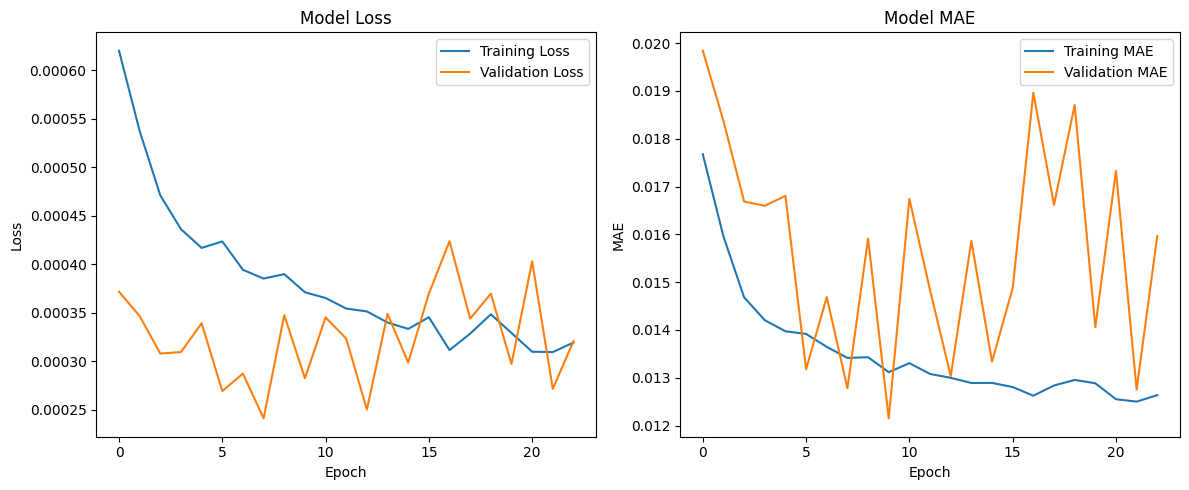

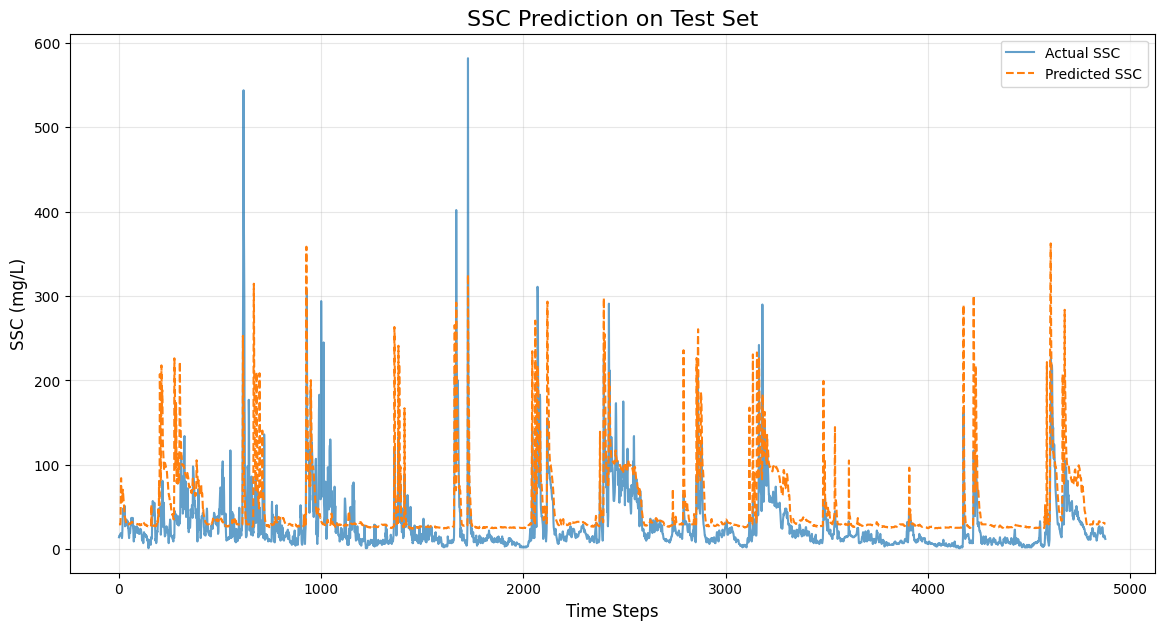

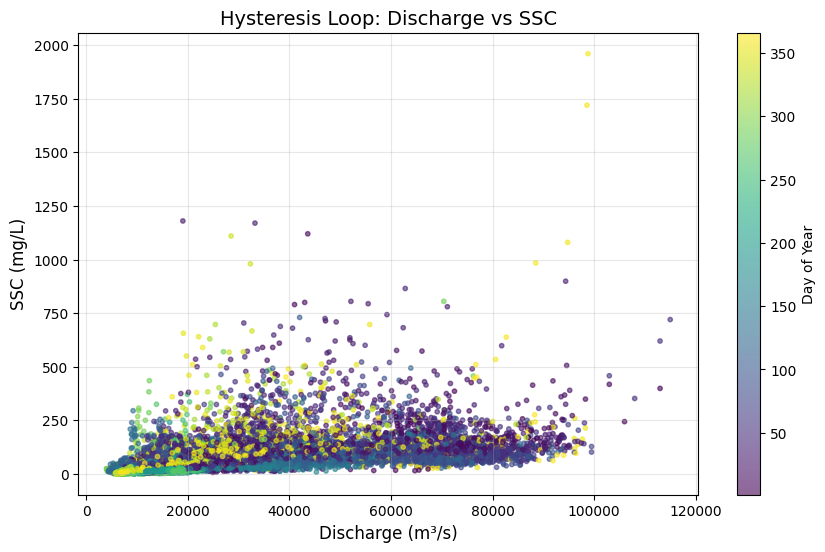


Calculating feature importance... This may take a few minutes.
153/153 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step
153/153 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step
153/153 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
153/153 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step
153/153 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
153/153 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step
153/153 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
153/153 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
153/153 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
153/153 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
153/153 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step
153/153 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step
153/153 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
153/153 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
153/153 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
153/153 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
153/153 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
153/153 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
153/153 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
153/153 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
153/153 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step
153/153 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step
153/153 ━━━━━━━━━━━━━━━━━━━━ 1

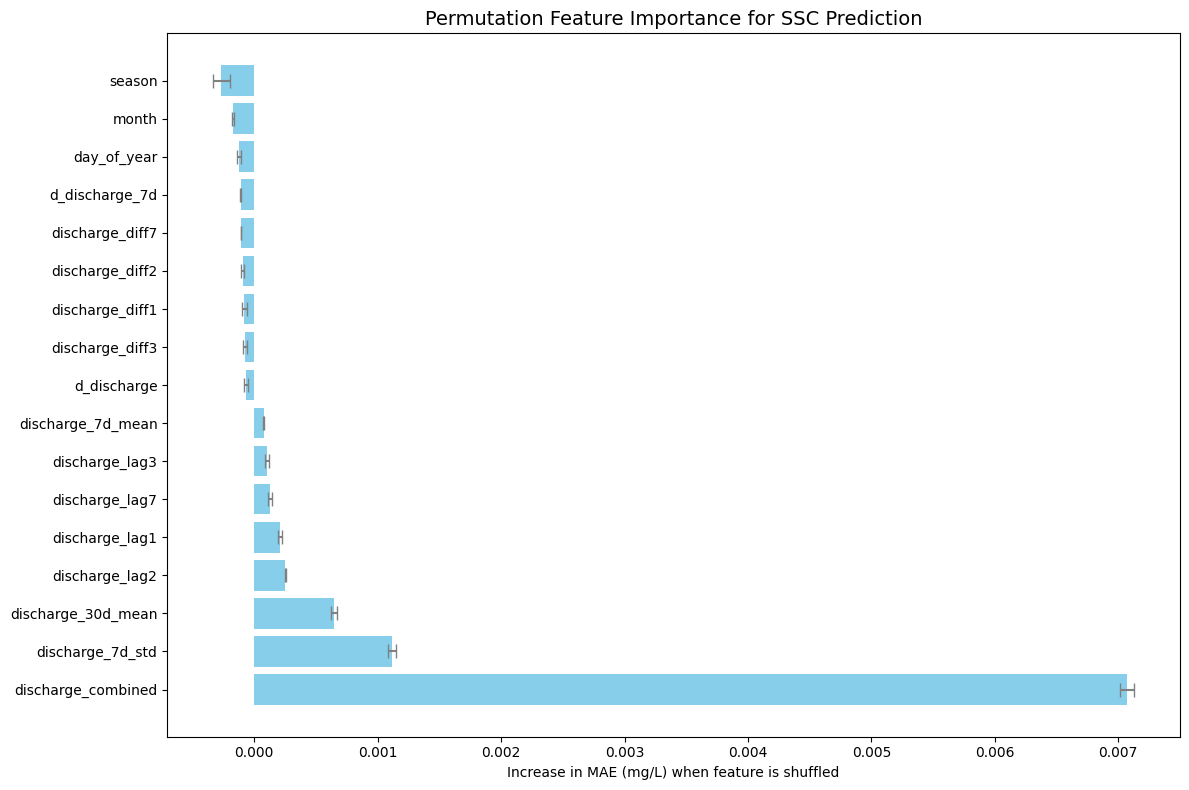


Calculating SHAP values... This may take several minutes.
SHAP calculation failed: in user code:

    File "/usr/local/lib/python3.11/dist-packages/shap/explainers/_deep/deep_tf.py", line 265, in grad_graph  *
        x_grad = tape.gradient(out, shap_rAnD)

    LookupError: gradient registry has no entry for: shap_TensorListStack

This is likely due to computational constraints in this environment.
Permutation importance results are still valid and reliable.
153/153 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
153/153 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
153/153 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
153/153 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
153/153 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
153/153 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
153/153 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
153/153 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step
153/153 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step
153/153 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
153/153 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step
153/153 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step
153/153 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
15

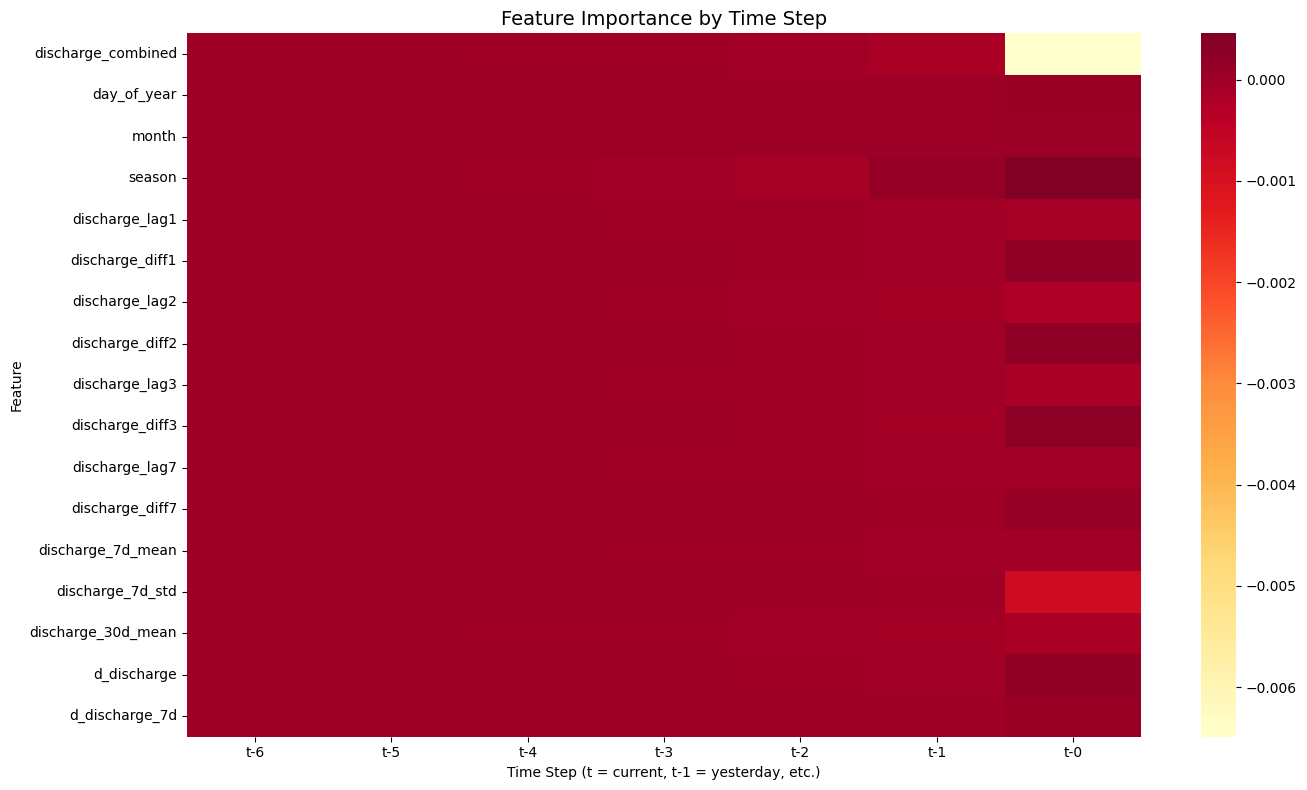


Top 5 most important features for SSC prediction:
1. discharge_combined: 0.0071 MAE increase when shuffled
2. discharge_7d_std: 0.0011 MAE increase when shuffled
3. discharge_30d_mean: 0.0006 MAE increase when shuffled
4. discharge_lag2: 0.0003 MAE increase when shuffled
5. discharge_lag1: 0.0002 MAE increase when shuffled


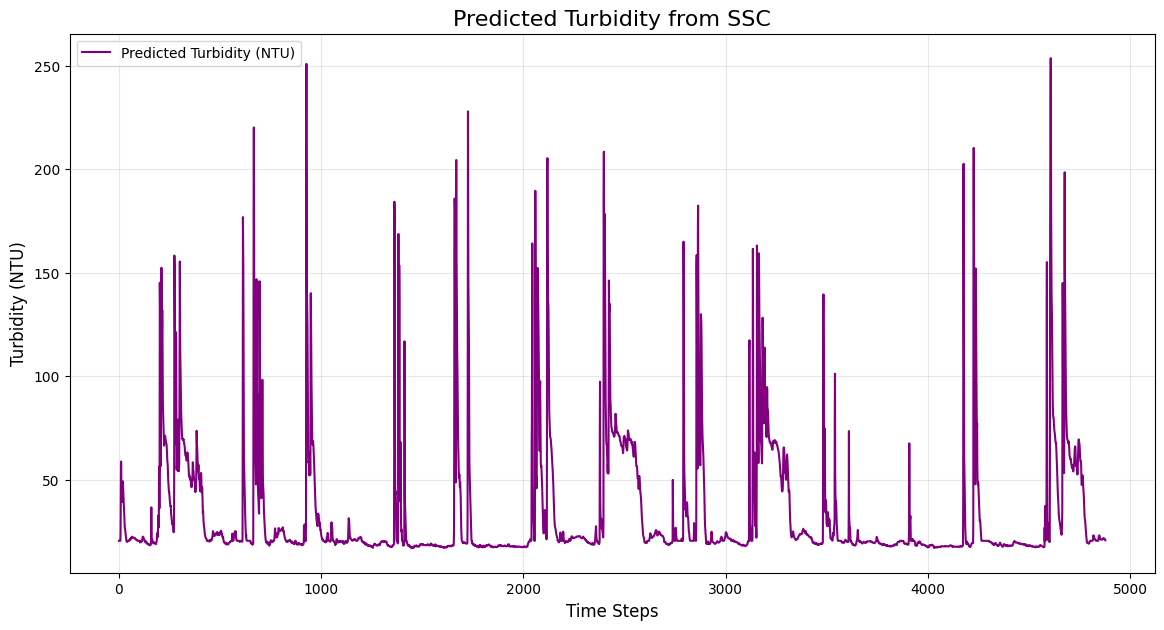


Turbidity prediction example (first 5 values):
SSC: [29.303045 29.303045 29.303045 29.303045 29.303045]
Turbidity (NTU): [20.51213 20.51213 20.51213 20.51213 20.51213]

Model and scalers saved successfully!
To use in production:
1. Load model with keras.models.load_model('ssc_prediction_model.keras')
2. Load scalers with np.load('scaler_X.npy', allow_pickle=True).item()


In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.losses import Huber
import seaborn as sns
import shap
import time
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('11447650_cleaned_daily_data.csv', parse_dates=['DATE'])

print(f"Generated synthetic data shape: {df.shape}")
print(df.head())

# ======================
# 2. FEATURE ENGINEERING
# ======================
def engineer_features(df):
    """Create time-based and hydrological features"""
    df = df.copy()

    # Ensure DATE is datetime
    if not pd.api.types.is_datetime64_any_dtype(df['DATE']):
        df['DATE'] = pd.to_datetime(df['DATE'])

    # Time features
    df['day_of_year'] = df['DATE'].dt.dayofyear
    df['month'] = df['DATE'].dt.month
    df['season'] = (df['DATE'].dt.month % 12 + 3) // 3  # 1=Winter, 2=Spring, etc.

    # Lag features (critical for hysteresis)
    for lag in [1, 2, 3, 7]:
        df[f'discharge_lag{lag}'] = df['discharge_combined'].shift(lag)
        df[f'discharge_diff{lag}'] = df['discharge_combined'] - df[f'discharge_lag{lag}']

    # Rolling statistics
    df['discharge_7d_mean'] = df['discharge_combined'].rolling(7).mean()
    df['discharge_7d_std'] = df['discharge_combined'].rolling(7).std()
    df['discharge_30d_mean'] = df['discharge_combined'].rolling(30).mean()

    # Rate of change
    df['d_discharge'] = df['discharge_combined'].diff()
    df['d_discharge_7d'] = df['discharge_combined'].diff(7)

    # Drop SSD since it's derived from SSC (not available in real-time prediction)
    df.drop(columns=['SSD'], inplace=True)

    # Remove NaN from feature engineering
    df.dropna(inplace=True)
    return df.set_index('DATE')

# Apply the fix: ensure DATE is datetime before feature engineering
df['DATE'] = pd.to_datetime(df['DATE'])
df_processed = engineer_features(df.copy())
print(f"\nAfter feature engineering: {df_processed.shape} features")
print("Features:", df_processed.columns.tolist())

# ======================
# 3. DATA PREPROCESSING
# ======================
# Split data (preserve temporal order)
train_size = int(0.8 * len(df_processed))
train_df = df_processed.iloc[:train_size]
test_df = df_processed.iloc[train_size:]

# Scale features
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

X_train = train_df.drop(columns=['SSC'])
y_train = train_df['SSC'].values.reshape(-1, 1)

X_test = test_df.drop(columns=['SSC'])
y_test = test_df['SSC'].values.reshape(-1, 1)

X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)
y_train_scaled = scaler_y.fit_transform(y_train)
y_test_scaled = scaler_y.transform(y_test)

# Create sequences for LSTM
def create_sequences(X, y, time_steps=7):
    X_seq, y_seq = [], []
    for i in range(time_steps, len(X)):
        X_seq.append(X[i-time_steps:i])
        y_seq.append(y[i])
    return np.array(X_seq), np.array(y_seq)

TIME_STEPS = 7
X_train_seq, y_train_seq = create_sequences(X_train_scaled, y_train_scaled, TIME_STEPS)
X_test_seq, y_test_seq = create_sequences(X_test_scaled, y_test_scaled, TIME_STEPS)

print(f"\nSequence shapes: X_train={X_train_seq.shape}, y_train={y_train_seq.shape}")

# ======================
# 4. BUILD & TRAIN MODEL
# ======================
model = Sequential([
    LSTM(128, return_sequences=True, input_shape=(TIME_STEPS, X_train_seq.shape[2])),
    Dropout(0.3),
    LSTM(64, return_sequences=False),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(1)
])

model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss=Huber(),
    metrics=['mae']
)

print("\nModel Summary:")
model.summary()

# Train with early stopping
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=15,
    restore_best_weights=True
)

history = model.fit(
    X_train_seq,
    y_train_seq,
    epochs=100,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stop],
    verbose=1
)

# ======================
# 5. EVALUATION & PLOTS
# ======================
# Predict and inverse transform
train_pred = model.predict(X_train_seq)
test_pred = model.predict(X_test_seq)

train_pred_inv = scaler_y.inverse_transform(train_pred)
test_pred_inv = scaler_y.inverse_transform(test_pred)
y_train_inv = scaler_y.inverse_transform(y_train_seq)
y_test_inv = scaler_y.inverse_transform(y_test_seq)

# Calculate metrics
train_mae = mean_absolute_error(y_train_inv, train_pred_inv)
test_mae = mean_absolute_error(y_test_inv, test_pred_inv)
train_r2 = r2_score(y_train_inv, train_pred_inv)
test_r2 = r2_score(y_test_inv, test_pred_inv)

print(f"\n{'='*50}")
print(f"TRAIN MAE: {train_mae:.2f} mg/L | R²: {train_r2:.4f}")
print(f"TEST MAE: {test_mae:.2f} mg/L | R²: {test_r2:.4f}")
print(f"{'='*50}")

# Plot training history
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('Model MAE')
plt.ylabel('MAE')
plt.xlabel('Epoch')
plt.legend()
plt.tight_layout()
plt.savefig('training_history.png', dpi=300)
plt.show()

# Plot predictions vs actual
plt.figure(figsize=(14, 7))
plt.plot(y_test_inv, label='Actual SSC', alpha=0.7)
plt.plot(test_pred_inv, label='Predicted SSC', linestyle='--')
plt.title('SSC Prediction on Test Set', fontsize=16)
plt.xlabel('Time Steps', fontsize=12)
plt.ylabel('SSC (mg/L)', fontsize=12)
plt.legend()
plt.grid(alpha=0.3)
plt.savefig('ssc_prediction.png', dpi=300)
plt.show()

# Plot hysteresis loop (discharge vs SSC)
plt.figure(figsize=(10, 6))
date_series = pd.Series(df['DATE']).dt
plt.scatter(
    df['discharge_combined'],
    df['SSC'],
    c=date_series.dayofyear,
    cmap='viridis',
    alpha=0.6,
    s=10
)
plt.colorbar(label='Day of Year')
plt.title('Hysteresis Loop: Discharge vs SSC', fontsize=14)
plt.xlabel('Discharge (m³/s)', fontsize=12)
plt.ylabel('SSC (mg/L)', fontsize=12)
plt.grid(alpha=0.3)
plt.savefig('hysteresis_loop.png', dpi=300)
plt.show()

# ======================
# 6. FEATURE IMPORTANCE ANALYSIS
# ======================
print("\nCalculating feature importance... This may take a few minutes.")

# Get feature names
feature_names = X_train.columns.tolist()

# 1. Permutation Feature Importance (Most reliable for any model)
def permutation_importance(model, X, y, metric, n_repeats=5):
    """Calculate permutation feature importance for time series data"""
    baseline_score = metric(y, model.predict(X).flatten())
    importances = np.zeros((X.shape[2], n_repeats))

    # For each feature
    for i in range(X.shape[2]):
        scores = []
        X_permuted = X.copy()

        # Repeat multiple times for stability
        for _ in range(n_repeats):
            # Shuffle only the current feature across all timesteps
            for t in range(TIME_STEPS):
                X_permuted[:, t, i] = np.random.permutation(X[:, t, i])

            # Calculate performance with shuffled feature
            y_pred = model.predict(X_permuted).flatten()
            score = metric(y, y_pred)
            scores.append(score - baseline_score)

        importances[i] = scores

    return np.mean(importances, axis=1), np.std(importances, axis=1)

# Convert to appropriate format for permutation importance
def prepare_for_permutation(X_seq, y_seq):
    # For permutation, we need to keep the sequence structure but flatten for metric calculation
    return X_seq, y_seq.flatten()

X_test_for_perm, y_test_for_perm = prepare_for_permutation(X_test_seq, y_test_seq)

# Calculate permutation importance
start_time = time.time()
perm_importance, perm_std = permutation_importance(
    model,
    X_test_for_perm,
    y_test_for_perm,
    metric=lambda y_true, y_pred: mean_absolute_error(y_true, y_pred),
    n_repeats=3  # Reduced for speed; use 5-10 for production
)
print(f"Permutation importance calculated in {time.time() - start_time:.2f} seconds")

# Sort features by importance
sorted_idx = np.argsort(perm_importance)[::-1]
sorted_features = [feature_names[i] for i in sorted_idx]
sorted_importance = perm_importance[sorted_idx]
sorted_std = perm_std[sorted_idx]

# Plot permutation feature importance
plt.figure(figsize=(12, 8))
plt.barh(
    range(len(sorted_importance)),
    sorted_importance,
    xerr=sorted_std,
    align='center',
    color='skyblue',
    ecolor='gray',
    capsize=5
)
plt.yticks(range(len(sorted_importance)), sorted_features)
plt.xlabel('Increase in MAE (mg/L) when feature is shuffled')
plt.title('Permutation Feature Importance for SSC Prediction', fontsize=14)
plt.tight_layout()
plt.savefig('feature_importance_permutation.png', dpi=300)
plt.show()

# 2. SHAP Values (More detailed but computationally expensive)
print("\nCalculating SHAP values... This may take several minutes.")

# Sample a smaller dataset for SHAP (computationally expensive)
sample_idx = np.random.choice(len(X_test_seq), min(100, len(X_test_seq)), replace=False)
X_sample = X_test_seq[sample_idx]

# Create explainer and calculate SHAP values
try:
    start_time = time.time()
    explainer = shap.DeepExplainer(model, X_train_seq[:min(100, len(X_train_seq))])
    shap_values = explainer.shap_values(X_sample)

    print(f"SHAP values calculated in {time.time() - start_time:.2f} seconds")

    # Aggregate SHAP values across time steps
    shap_values_agg = np.abs(shap_values[0]).mean(axis=1)  # Average across time steps
    shap_importance = np.abs(shap_values_agg).mean(axis=0)

    # Sort features by SHAP importance
    shap_sorted_idx = np.argsort(shap_importance)[::-1]
    shap_sorted_features = [feature_names[i] for i in shap_sorted_idx]
    shap_sorted_importance = shap_importance[shap_sorted_idx]

    # Plot SHAP feature importance
    plt.figure(figsize=(12, 8))
    plt.barh(
        range(len(shap_sorted_importance)),
        shap_sorted_importance,
        align='center',
        color='lightgreen'
    )
    plt.yticks(range(len(shap_sorted_importance)), shap_sorted_features)
    plt.xlabel('|SHAP Value| (mean |impact on model output|)')
    plt.title('SHAP Feature Importance for SSC Prediction', fontsize=14)
    plt.tight_layout()
    plt.savefig('feature_importance_shap.png', dpi=300)
    plt.show()

    # Summary plot
    plt.figure(figsize=(12, 10))
    shap.summary_plot(shap_values[0], X_sample.reshape(X_sample.shape[0], -1), feature_names=feature_names, plot_type="bar")
    plt.title('SHAP Summary Plot', fontsize=14)
    plt.tight_layout()
    plt.savefig('shap_summary.png', dpi=300)
    plt.show()

except Exception as e:
    print(f"SHAP calculation failed: {e}")
    print("This is likely due to computational constraints in this environment.")
    print("Permutation importance results are still valid and reliable.")

# 3. Feature Importance by Time Step
plt.figure(figsize=(14, 8))
# Create a matrix of importance by feature and time step
importance_matrix = np.zeros((X_test_seq.shape[2], X_test_seq.shape[1]))

# Calculate impact by shuffling each feature at each time step
for t in range(TIME_STEPS):
    for i in range(X_test_seq.shape[2]):
        X_permuted = X_test_seq.copy()
        X_permuted[:, t, i] = np.random.permutation(X_test_seq[:, t, i])

        y_pred = model.predict(X_permuted).flatten()
        baseline_pred = model.predict(X_test_seq).flatten()

        # Calculate MAE difference
        diff = mean_absolute_error(y_test_inv, y_pred) - mean_absolute_error(y_test_inv, baseline_pred)
        importance_matrix[i, t] = diff

# Plot heatmap of feature importance over time
sns.heatmap(
    importance_matrix,
    xticklabels=[f't-{TIME_STEPS-1-t}' for t in range(TIME_STEPS)],
    yticklabels=feature_names,
    cmap='YlOrRd',
    annot=False
)
plt.xlabel('Time Step (t = current, t-1 = yesterday, etc.)')
plt.ylabel('Feature')
plt.title('Feature Importance by Time Step', fontsize=14)
plt.tight_layout()
plt.savefig('feature_importance_time.png', dpi=300)
plt.show()

# Print top features
print("\nTop 5 most important features for SSC prediction:")
for i in range(min(5, len(sorted_features))):
    print(f"{i+1}. {sorted_features[i]}: {sorted_importance[i]:.4f} MAE increase when shuffled")

# ======================
# 7. TURBIDITY CONVERSION
# ======================
def ssc_to_turbidity(ssc_values, site_calibration=None):
    """
    Convert SSC to Turbidity (NTU) using site-specific calibration

    Default calibration (adjust based on your site!):
    - River systems: turbidity = 0.7 * SSC
    - Turbid estuaries: turbidity = 1.2 * SSC
    """
    if site_calibration is None:
        # Typical river calibration (MUST BE VALIDATED FOR YOUR SITE)
        site_calibration = 0.7

    return ssc_values * site_calibration

# Example usage on test predictions
test_turbidity = ssc_to_turbidity(test_pred_inv.flatten())

# Plot turbidity prediction
plt.figure(figsize=(14, 7))
plt.plot(test_turbidity, label='Predicted Turbidity (NTU)', color='purple')
plt.title('Predicted Turbidity from SSC', fontsize=16)
plt.xlabel('Time Steps', fontsize=12)
plt.ylabel('Turbidity (NTU)', fontsize=12)
plt.legend()
plt.grid(alpha=0.3)
plt.savefig('turbidity_prediction.png', dpi=300)
plt.show()

print("\nTurbidity prediction example (first 5 values):")
print(f"SSC: {test_pred_inv[:5].flatten()}")
print(f"Turbidity (NTU): {test_turbidity[:5]}")

# ======================
# 8. SAVE MODEL & SCALERS
# ======================
model.save('ssc_prediction_model.keras')
np.save('scaler_X.npy', scaler_X)
np.save('scaler_y.npy', scaler_y)

print("\nModel and scalers saved successfully!")
print("To use in production:")
print("1. Load model with keras.models.load_model('ssc_prediction_model.keras')")
print("2. Load scalers with np.load('scaler_X.npy', allow_pickle=True).item()")